# Goal: Creating a popcorn map representing genres and relationships of a spotify song dataset <br>
## Loading and scaling the dataset:

In [1]:
import pandas as pd
from IPython.display import display, Markdown

df = pd.read_csv("../data/raw_data/dataset.csv", index_col=0)
display(Markdown("**Loaded Spotify Tracks Dataset from Kaggle:**\n"))
print(f"Rows count: {df.shape[0]}  |  Columns count: {df.shape[1]}")
display(Markdown("### Overview of dataset"))
df_cols = df.columns
df_cols_str = " ".join([f"`{c}`" for c in df_cols])
display(Markdown("**Columns:**<br>" + df_cols_str))

display(Markdown("**First 5 rows of dataset:**"))
display(df.head(5))

**Loaded Spotify Tracks Dataset from Kaggle:**


Rows count: 114000  |  Columns count: 20


### Overview of dataset

**Columns:**<br>`track_id` `artists` `album_name` `track_name` `popularity` `duration_ms` `explicit` `danceability` `energy` `key` `loudness` `mode` `speechiness` `acousticness` `instrumentalness` `liveness` `valence` `tempo` `time_signature` `track_genre`

**First 5 rows of dataset:**

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Forming the working dataset with key features for processing:
**Features- mode, key and liveness are left out because they could add too much noise**
<br>
**Duration and tempo are transformed to control spikes in data**


In [2]:
from scipy.stats._mstats_basic import winsorize
import numpy as np

dataset_features = [
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'valence',
    'tempo',
    'duration_ms'
]

df_working = df.dropna(subset=dataset_features).reset_index(drop=True)

Set = df_working[dataset_features].copy()
Set["duration_ms"]= np.log1p(Set["duration_ms"])
Set["tempo"]= winsorize(Set["tempo"], limits=(0.01,0.01))

Set_cols = Set.columns
Set_cols_str = " ".join([f"`{c}`" for c in Set_cols])
display(Markdown("**Columns:**<br>" + Set_cols_str))
display(Markdown("**First 5 rows of working dataset:**"))
display(Set.head(5))

**Columns:**<br>`danceability` `energy` `loudness` `speechiness` `acousticness` `instrumentalness` `valence` `tempo` `duration_ms`

**First 5 rows of working dataset:**

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms
0,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.715,87.917,12.348730
1,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.267,77.489,11.915794
2,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.120,76.332,12.258793
3,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.143,181.740,12.215696
4,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.167,119.949,12.200326


### Standardizing the data in the working dataset:

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Set_scaled = scaler.fit_transform(Set)

display(Markdown("**Data normalized with StandardScaler:**"))
print(f"Working set shape: {Set_scaled.shape}")

display(Markdown("**First 5 rows of standardized working dataset:**"))
df_scaled = pd.DataFrame(Set_scaled,columns=dataset_features, index=df_working.index)

df_scaled.head(5)

**Data normalized with StandardScaler:**

Working set shape: (114000, 9)


**First 5 rows of standardized working dataset:**

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms
0,0.629244,-0.717148,0.300828,0.551848,-0.850202,-0.504109,0.929306,-1.166796,0.221311
1,-0.845908,-1.889980,-1.784744,-0.078993,1.831732,-0.504094,-0.798690,-1.521474,-0.908708
2,-0.742186,-1.122669,-0.293288,-0.273826,-0.315499,-0.504112,-1.365688,-1.560826,-0.013436
3,-1.733304,-2.312994,-2.039252,-0.457309,1.774593,-0.503883,-1.276974,2.024321,-0.125925
4,0.295030,-0.788711,-0.282750,-0.303145,0.463399,-0.504112,-1.184403,-0.077320,-0.166043


## Neighborhood Embedding on standardized dataset with 2D-UMAP for later visualization :

### Configuring 2D-UMAP parameters:

In [4]:
import umap.umap_ as umap

umap_params = dict(
    n_neighbors=45,
    min_dist=0.15,
    n_components=2,
    metric="euclidean",
    random_state=42
)

### Fitting UMAP on the standardized dataset:

In [5]:
reducer2 = umap.UMAP(**umap_params)
embedding_2d = reducer2.fit_transform(Set_scaled)

embedding_2d.shape

/home/david/miniconda3/envs/clustering/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(114000, 2)

### Adding resulting UMAP coordinates to original dataset and plotting for overview of 2D-neighborhood distribution:

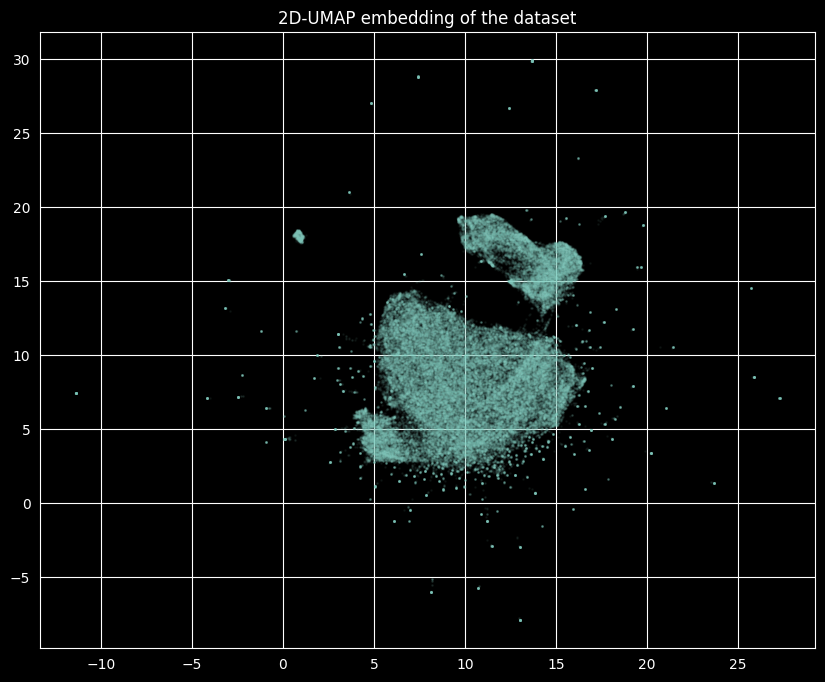

In [6]:
import matplotlib.pyplot as plt

df_working["x"] = embedding_2d[:, 0]
df_working["y"] = embedding_2d[:, 1]

plt.figure(figsize=(10, 8))
plt.scatter(
    df_working["x"],
    df_working["y"],
    s=1,
    alpha=0.05
)
plt.title("2D-UMAP embedding of the dataset")
plt.show()

**Explanation:**
<br>
 This shows how the neighborhoods in the original dataset are distributed, so which songs are similar to others. This is purely for further visualization with the popcorn map. <br>
 For the clustering, a UMAP-algorithm with 10 Dimensions will be used because it preserves more of the local neighborhood structure and density information and does not flatten them too much for visualization.

## Clustering the data with K-MEANS:

### Using 10D-UMAP on the dataset to use as input for K-MEANS:

In [7]:
import umap.umap_ as umap

#Conifguring the parameters
umap10_params = dict(
    n_neighbors=45,
    min_dist=0.15,
    n_components=10,
    metric="euclidean",
    random_state=42
)

#Fitting the algorithm
reducer10 = umap.UMAP(**umap10_params)
embedding_10d = reducer10.fit_transform(Set_scaled)

embedding_10d.shape


/home/david/miniconda3/envs/clustering/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(114000, 10)

### Configuring K-MEANS Parameters:

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=40,
    random_state=42,
    n_init="auto"
)

### Fitting K-MEANS on the 10D-UMAP Embedding:

In [9]:
kmeans.fit(embedding_10d)

KMeans(n_clusters=40, random_state=42)

### Adding Clustering labels to original dataset:

In [10]:
kmeans_labels= kmeans.predict(embedding_10d)
df_working["kmeans_cluster"] = kmeans_labels

### Plotting the 2D-UMAP colored by the resulting cluster labels from K-MEANS

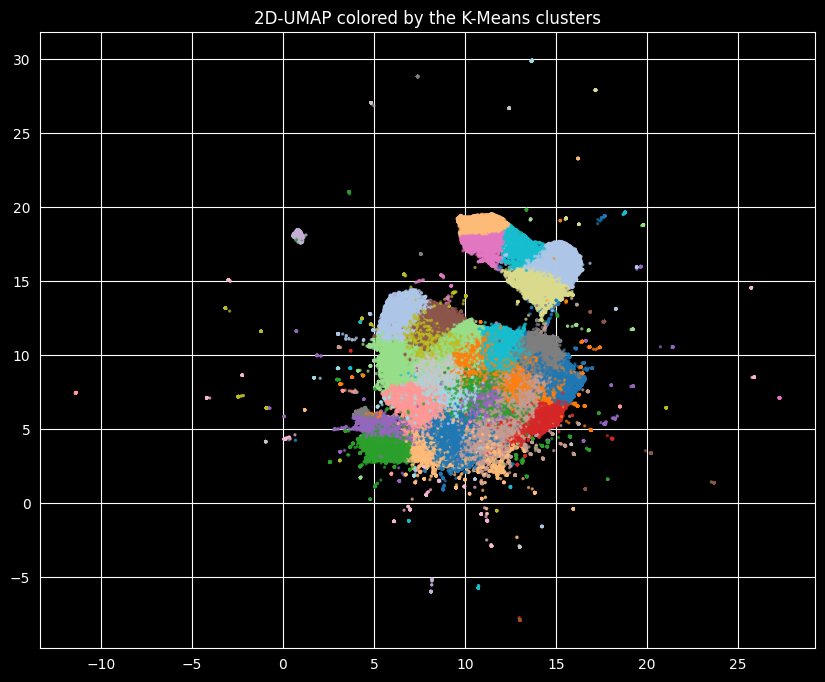

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(
    df_working["x"],
    df_working["y"],
    c=df_working["kmeans_cluster"],
    s=2,
    cmap="tab20",
    alpha=0.6
)
plt.title("2D-UMAP colored by the K-Means clusters")
plt.show()
